# Effects of Advertising on Sales



## Context 

- An interesting application of regression is to quantify the effect of advertisement on sales. Various channels of advertisement are newspaper, TV, radio, etc. 
- In this case study, we will have a look at the **advertising data of a company** and try to see its **effect on sales**.
- We will also try to **predict the sales given the different parameters of advertising**. 


## Data Information

The data at hand has three features about the spending on advertising and the target variable is the net sales. Attributes are:

- TV    - Independent variable quantifying budget for TV ads
- Radio - Independent variable quantifying budget for radio ads 
- News  - Independent variable quantifying budget for news ads
- Sales - Dependent variable

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
Ad_df = pd.read_csv('Advertising.csv')

# Load the data into the Ad_df data frame
Ad_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# we can drop the first column as it is just the index
Ad_df.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
Ad_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Observations:** All the variables are of **float data type**.

## Simple Linear Regression
#### We will use one feature at a time and have a look at the target variable. 

In [6]:
# Dataset is stored in a Pandas Dataframe. Let us take out all the variables into a numpy array.
Sales = Ad_df.sales.values.reshape(len(Ad_df['sales']), 1)
TV = Ad_df.TV.values.reshape(len(Ad_df['sales']), 1)
Radio = Ad_df.radio.values.reshape(len(Ad_df['sales']), 1)
Newspaper = Ad_df.newspaper.values.reshape(len(Ad_df['sales']), 1)
print(Sales)
print(TV)
print(Radio)
print(Newspaper)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


In [7]:
# let us fit the simple linear regression model with the TV feature
tv_model = linear_model.LinearRegression()
tv_model.fit(TV, Sales)
coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten())) # array of co-efficients and intercept
coeffs_tv = list(coeffs_tv) # convert array into list

# let us fit the simple linear regression model with the Radio feature
radio_model = linear_model.LinearRegression()
radio_model.fit(Radio, Sales)
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_radio = list(coeffs_radio)

# let us fit the simple linear regression model with the Newspaper feature
newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(Newspaper, Sales)
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coeffs_newspaper = list(coeffs_newspaper)

# let us store the above results in a dictionary and then display using a dataframe
dict_Sales = {}
dict_Sales["TV"] = coeffs_tv
dict_Sales["Radio"] = coeffs_radio
dict_Sales["Newspaper"] = coeffs_newspaper

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [8]:
# Let us now calculate R^2
tv_rsq = tv_model.score(TV, Sales)
radio_rsq = radio_model.score(Radio, Sales)
newspaper_rsq = newspaper_model.score(Newspaper, Sales)

print("TV simple linear regression R-Square :", tv_rsq)
print("Radio simple linear regression R-Square :", radio_rsq)
print("Newspaper simple linear regression R-Square :", newspaper_rsq)

# Create list of R2s to add to the dataframe
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
list_rsq

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [9]:
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


**Observations:** We can see that TV has the highest R^2 value i.e. 61% followed by Radio and Newspaper

Let's try to visualize the best fit line using the regression plot

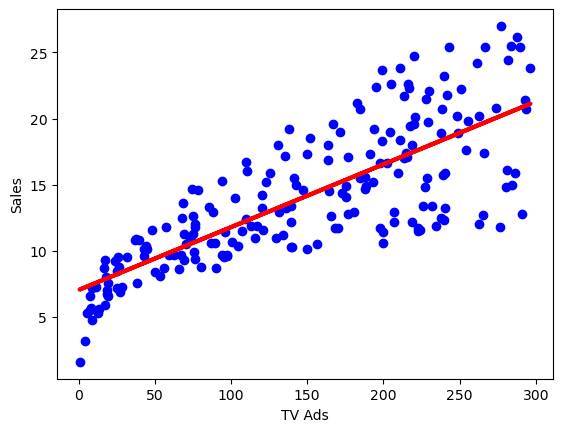

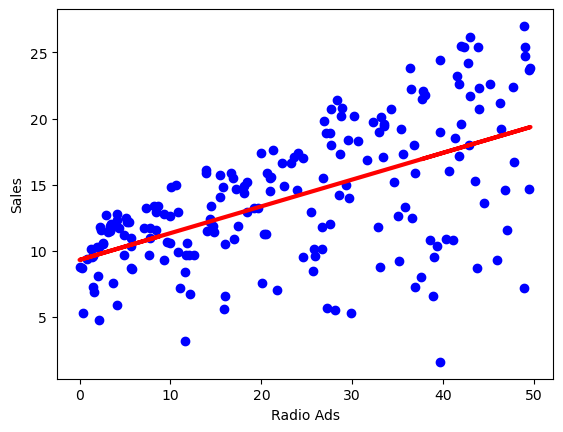

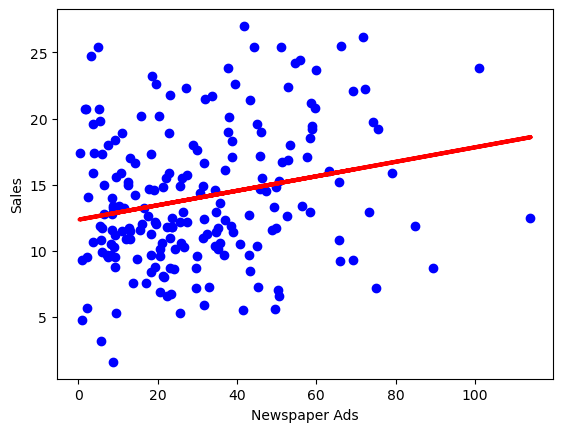

In [10]:
plt.scatter(TV, Sales,  color='blue')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(TV, tv_model.predict(TV), color='red', linewidth=3) # Plot the regression line
plt.show()

plt.scatter(Radio, Sales,  color='blue')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(Radio, radio_model.predict(Radio), color='red', linewidth=3)
plt.show()

plt.scatter(Newspaper, Sales,  color='blue')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.plot(Newspaper, newspaper_model.predict(Newspaper), color='red', linewidth=3)
plt.show()


We see that the regression line has a better fit for the TV ads, and the worst fit for Newspaper ads. 

## Multiple Linear Regression

In [11]:
# Multiple Linear Regression Model
mlr_model = linear_model.LinearRegression() # Instantiate the linear regression model
mlr_model.fit(Ad_df[['TV', 'radio', 'newspaper']], Ad_df['sales']) # Set the features and target variable

LinearRegression()

In [12]:
# Create a column in the dataframe that predicts sales for TV, radio, and newspaper
Ad_df['Sales_Predicted']  = mlr_model.predict(Ad_df[['TV', 'radio', 'newspaper']]) 

# Create another column in the dataframe containing the squared values of difference between actual sales and predicted sales
Ad_df['Error'] = (Ad_df['Sales_Predicted'] - Ad_df['sales'])**2

# Calculate the mean of the squared errors (MSE)
MSE_MLR = Ad_df['Error'].mean()

In [13]:
MSE_MLR

2.7841263145109356

The average squared difference between the predicted and actual values is relatively low. To further understand the context of MSE and the performance of the model, we need the R2 value. 

In [14]:
# Calculate the R2 value for multiple LRM
mlr_model.score(Ad_df[['TV', 'radio', 'newspaper']], Ad_df['sales'])

0.8972106381789521

**Observations:** 
- The **R^2 value** for the multiple linear regression comes out to be **89.7%** i.e. way **better than simple linear regression**
- An R2 value of 0.89 means that the model is able to explain 89% of the variance in the sales variable based on its predictors. - This implies that the **model is a relatively good fit for the data** and is able to capture most of the variation in the sales variable that can be explained by the predictor variables.

Let's now try to use **statsmodel** to get a more detailed model interpretation

In [15]:
# let us get a more detailed model through statsmodel.
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper', data = Ad_df).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        14:45:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [16]:
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse) 
print("*************Confidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())


*************Parameters**************
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
*************Confidence Interval**************
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.446875

- The **R-squared value** of the model is **0.897**, which means that approximately 89.7% of the variability in the Sales variable can be explained by the predictor variables.
- The **Adjusted R-squared value** is **0.896**, which takes into account the number of predictor variables in the model and penalizes the R-squared value for adding unnecessary predictors.
- The **F-statistic** of the model is **570.3** with a **corresponding probability (p-value) of 1.58e-96**, which indicates that the model as a whole is statistically significant in predicting the Sales variable.
- The **intercept term of the model is 2.9389**, which represents the expected value of the Sales variable when all the predictor variables are zero. 
- The **coefficients for the predictor variables TV, Radio, and Newspaper are 0.0458, 0.1885, and -0.0010**, respectively. These coefficients represent the expected change in the Sales variable for a one-unit increase in each corresponding predictor variable, while holding the other predictor variables constant.

#### Visualizing the confidence bands in Simple linear regression

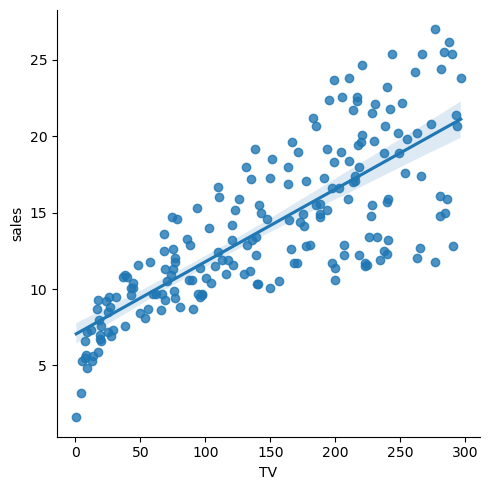

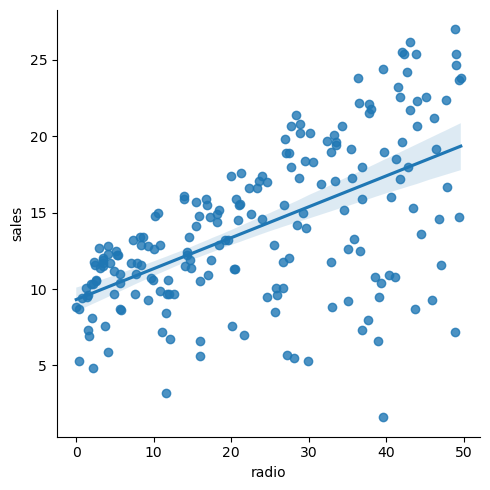

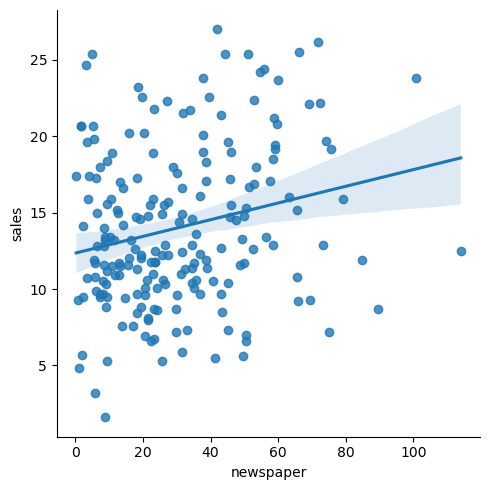

In [17]:
# lmplot is a Linear Regression Model Plot
import seaborn as sns
sns.lmplot(x = 'TV', y = 'sales', data = Ad_df)

sns.lmplot(x = 'radio', y = 'sales', data = Ad_df )

sns.lmplot(x = 'newspaper', y = 'sales', data = Ad_df)

- The **confidence band** represents the range of values within which the true regression line is expected to fall with a certain level of confidence.
- It is seen that the confidence band around the regression line for **TV ads is narrow** (relatively precise relationship), while for **newspaper ads is really wide**. This indicates a **large degree of uncertainty** in the estimate of the relationship between sales and newspaper ads.  

# Model Evaluation
### Cross validation 

- We realize that the newspaper can be omitted from the list of significant features owing to the p-value associated with the t-statistic. (from the OLS regression results, the `p-value for newspaper ads is significant`, and  this feature is not a significant predictor of the target variable and can be omitted from the model without affecting its overall performance.)
- Let us now run the regression analysis adding a multiplicative feature in it.

In [18]:
# Create a new feature - TV*Radio
Ad_df['TVandRadio'] = Ad_df['TV']*Ad_df['radio']

In [19]:
# Remove the sales_predicted and the error column generated earlier
Ad_df.drop(columns = ["Error", "Sales_Predicted"], inplace = True)

In [20]:
# Modelling with the new feature
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          2.92e-144
Time:                        14:45:05   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.0

**Observations**
- The output shows the estimated coefficients for each predictor variable, as well as the intercept term. The "std err" column provides the standard error of each coefficient estimate, and the "t" column gives the corresponding t-statistic. The "P>|t|" column provides the p-value associated with each t-statistic, indicating the statistical significance of each predictor variable.
- We see an **increase in the R-square here**. 

However, is this model useful for prediction? Does it predict well for the unseen data? Let us find out!

### Performance assessment, testing and validation

#### Train, Test, and Validation set
- We will split data into three sets, one to train the model, one to validate the model performance (not seen during training) and make improvements, and the last to test the model.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# List that includes all columns from df excluding sales and TVandRadio
features_base = [i for i in Ad_df.columns if i not in ("sales" , "TVandRadio")]

# List including all columns in df except sales
features_added = [i for i in Ad_df.columns if i not in "sales"]

#Split data into target, train, and test
target  = 'sales'
train, test = train_test_split(Ad_df, test_size = 0.10, train_size = 0.9)

In [23]:
# Spilt train data into train and validation
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [24]:
train.shape, validation.shape,test.shape

((144, 5), (36, 5), (20, 5))

In [25]:
# now let us start with the modelling
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression class and store in mlr
mlr = LinearRegression()

# Fit the model to training data
mlr.fit(train[features_base], train[target])

# Print header
print("*********Training set Metrics**************")

# Calculate and print R2 value
print("R-Squared:", mlr.score(train[features_base], train[target]))

# Calculate squared error b/w actual and predicted value
se_train = (train[target] - mlr.predict(train[features_base]))**2

# Calculate and print mean squared error
mse_train = se_train.mean()
print('MSE: ', mse_train)

# Print header
print("********Validation set Metrics**************")

# R squared for validation set
print("R-Squared:", mlr.score(validation[features_base], validation[target]))

# SE 
se_val = (validation[target] - mlr.predict(validation[features_base]))**2

# MSE
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.8989773438966847
MSE:  2.620997296822977
********Validation set Metrics**************
R-Squared: 0.8682183948413035
MSE:  3.268257019938539


We have evaluated the performance of the linear regression model on the training and validation sets. As seen, the model performs well on both the training and validation sets.

In [26]:
# Can we increase the model performance by adding the new feature? 
# We found that to be the case in the analysis above but let's check the same for the validation dataset

mlr_added_feature = LinearRegression()
mlr_added_feature.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))
se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))
se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9684401088657385
MSE:  0.8188102802041874
********Validation set Metrics**************
R-Squared: 0.9742273467654788
MSE:  0.6391761183568092


**Observations**
- We found the `R-squared increased` as we would expect `after adding a feature`. Also the `error decreased`. Let us now fit a regularized model.

## Regularization 

In [27]:
features_added

['TV', 'radio', 'newspaper', 'TVandRadio']

### Fit a Ridge Regression model on training set

In [28]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Ridge with the default features
ridge = Ridge()
ridge.fit(train[features_added], train[target])

print("*********Training set Metrics**************")

print("R-Squared:", ridge.score(train[features_added], train[target]))

se_train = (train[target] - ridge.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)

print("********Validation set Metrics**************")

print("R-Squared:", ridge.score(validation[features_added], validation[target]))

se_val = (validation[target] - ridge.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9684401088399249
MSE:  0.8188102808739129
********Validation set Metrics**************
R-Squared: 0.9742276468226228
MSE:  0.6391686767729428


- The R squared value for the training and test sets are quite the same here

### Fit a Lasso Regression model on training set

In [29]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting Lasso with the default features
lasso = Lasso()
lasso.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", lasso.score(train[features_added], train[target]))
se_train = (train[target] - lasso.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", lasso.score(validation[features_added], validation[target]))
se_val = (validation[target] - lasso.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9675315567638371
MSE:  0.842382345075173
********Validation set Metrics**************
R-Squared: 0.9756056774311809
MSE:  0.6049927521081412


In [30]:
#Let us predict on the unseen data using Ridge

rsq_test = ridge.score(test[features_added], test[target])
se_test = (test[target] - ridge.predict(test[features_added]))**2
mse_test = se_test.mean()

print("*****************Test set Metrics******************")

print("Rsquared: ", rsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

*****************Test set Metrics******************
Rsquared:  0.9520436430914012
MSE:  1.835726181739944
Intercept is 7.050831296111644 and Coefficients are [0.01786591 0.02483811 0.0009921  0.00109058]


* The performance of the ridge model on the test set is very good. 

- We will now evaluate the performance using the LooCV and KFold methods.

### K-Fold and LooCV (Leave One Out Cross Validation)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [32]:
# Use Ridge to perform 10-fold cross validation
ridgeCV = Ridge()

# Cross validation score
cvs = cross_val_score(ridgeCV, Ad_df[features_added], Ad_df[target], cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")

# Print confidence interval
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 

# note that the same can be set as LooCV if cv parameter above is set to n, i.e, 200.

Mean Score:
0.9649887636257694 

Confidence Interval:


(0.9430473456799696, 0.9869301815715691)

* The mean score is 0.96. The model is able to generalize well to unseen data.
* The CI is relatively narrow which indicates that the mean score is a reliable estimate of the model's true performance.

## Bootstrapping

In [36]:
# let us get a more detailed model through statsmodel for TV ads.
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'sales ~ TV', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        18:45:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

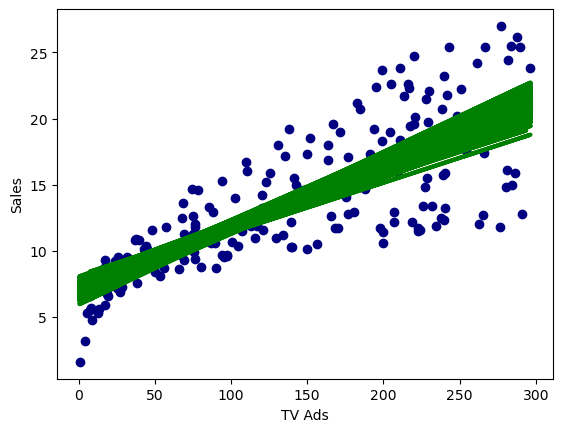

In [38]:
# Bootstrap resampling 1000 times to estimate the slope parameter of a linear regression model of TV ad spending on sales

import statsmodels.formula.api as smf

# Initialize an empty list
Slope = []

# Create a loop that will run 1000 times, each time selecting a random sample of 200 rows from the df
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )

# Fit a linear regression model to the bootstrap sample
  lm3 = smf.ols(formula= 'sales ~ TV', data = bootstrap_df).fit()
    
# Append the slope value to the Slope list
  Slope.append(lm3.params.TV)
  
    # Plot the fitted line for the currrent bootstrap sample on a scatter plot
  plt.xlabel('TV Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['TV'], lm3.predict(bootstrap_df['TV']), color='green', linewidth=3) # line plot
  
plt.scatter(Ad_df['TV'], Ad_df['sales'],  color=(0,0,0.5)) # scatter plot
plt.show()


In [39]:
# Let's now find out the 2.5 and 97.5 percentile for the slopes obtained (95% CI)
import numpy as np

Slope = np.array(Slope)
Sort_Slope = np.sort(Slope)

# Create lower and upper slope limits (CI)
Slope_limits = np.percentile(Sort_Slope, (2.5, 97.5))
Slope_limits

array([0.04182351, 0.05282224])

We are 95% confident that the **true slope** of the population regression line is **between these two values**.

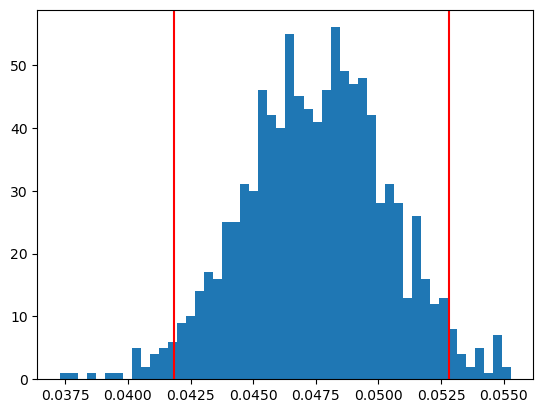

In [40]:
# Plotting the slopes and the upper and the lower limits
# Histogram of the slope values with 50 bins
plt.hist(Slope, 50)

# Add a vertical line to the plot at the value of the lower limit of the 95% confidence interval
plt.axvline(Slope_limits[0], color = 'r')

# Add another vertical line to the plot at the value of the upper limit of the 95% confidence interval
plt.axvline(Slope_limits[1], color = 'r')

* This output shows a **histogram of the distribution of slopes** obtained through **bootstrapping** along with the 2.5th and 97.5th percentiles. 
* The **red vertical lines** indicate the **lower and upper limits of the confidence interval of the slope**. 
* This graph helps us **visualize the distribution of the slopes** and the **extent of variation in the slope estimates we can expect** from different samples.

# End